# **Red Wine Classification**


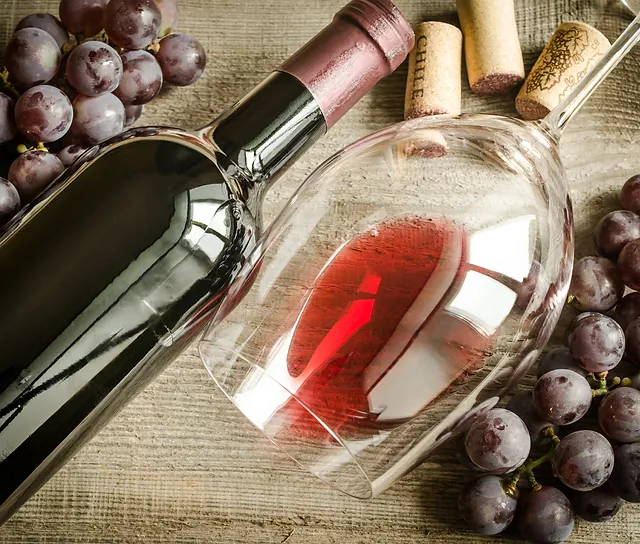

##**General description of the project**

###Source Data

Kaggle - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

The goal of the project is to predict the quality of red grape wine through characteristic analysis and machine learning models.

###Features

* Fixed Acidity - Amount of tartaric acid in g/L, although more generally
fixed acids in wine include malic, citric, and succinic acid as well.
* Volatile Acidity - Amount of acetic acid (vinegar) in g/L. More generally volatile acids may also include lactic, formic, butiric, and propionic acids. These acids are associated with spoilage in wine.
* Citric Acid - Amount of citric acid in g/L. Citric acid is normally present in small amounts in grapes but may be added to wine to increase acidity.
* Residual Sugar - Typically the amount of natural sugar in g/L remaining in the wine after fermentation completes. Some countries allow additional sugar to be added, but this practice has fallen out of favor with critics.
* Chlorides - Amount of sodium chloride in g/L.
* Free Sulfur Dioxide - Amount of sulfites available to react in mg/L.  
* Sulfites (sulfur dioxide or  𝑆𝑂2
 ) are often added to wine as a preservative, but some also occurs naturally.
* Total Sulfur Dioxide - Total amount of free and already reacted (bound) sulfites in mg/L.
* Density - Measured in g/ml.
* pH - Measurement of the acidity of the wine (lower pH is more acidic.)
* Sulphates - A different form of naturally occurring sulfur ( 𝑆𝑂4
 ) that depends on the composition of the soil in which the grapes are grown.
* Alcohol - Percent alcohol by volume.

Quality is an ordinal characteristic, and other characteristics are numerical.

## **Importing necessary libraries and modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
from PIL import Image
import requests

warnings.filterwarnings("ignore")

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

from statistics import mean
%matplotlib inline

## **Data Exploration**

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")

Below are the first 5 rows of data:

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.shape

(1599, 12)

The data consists of 1599 rows and 12 columns. 11 of the columns are dependent variables and 1 is independent.

In [ ]:
num_duplicates = df.duplicated().sum()

print("Number of duplicates:", num_duplicates)

Number of duplicates: 240


In [ ]:
df.drop_duplicates(inplace=True)

We removed the repeated rows.

In [ ]:
df.shape

(1359, 12)

As a result, we got 1359 lines.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So we have no missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


All features are numeric (float64, int64).

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

There is a significant difference in the 75% quantile and maximum values ​​of "residual sugar", "chlorides", "free sulfur dioxide" characteristics. The same can be seen in the 25% quantile and minimum values ​​of "free sulfur dioxide" and "total sulfur dioxide" characteristics.

Thus, observations 1 and 2 show that there are extreme values in our data, that could be outliers.

In [ ]:
quality = df.quality.unique()
quality.sort()
quality

array([3, 4, 5, 6, 7, 8])

Quality ratings 1, 2, 9, 10 are missing in the data.

## **Data Visualization**

In [ ]:
palette_1 = ["#200303", "#340805", "#560e0c", "#8f3d38", "#a86d69", "#b38c8b"][::-1]
palette_2 = ["#200303", "#280404", "#300505", "#340805", "#3c0a06", "#440b07", "#4a0c08", "#560e0c", "#6b1921", "#803034", "#8f3d38", "#9a4b45", "#a86d69", "#af7e7c", "#b38c8b"][::-1]


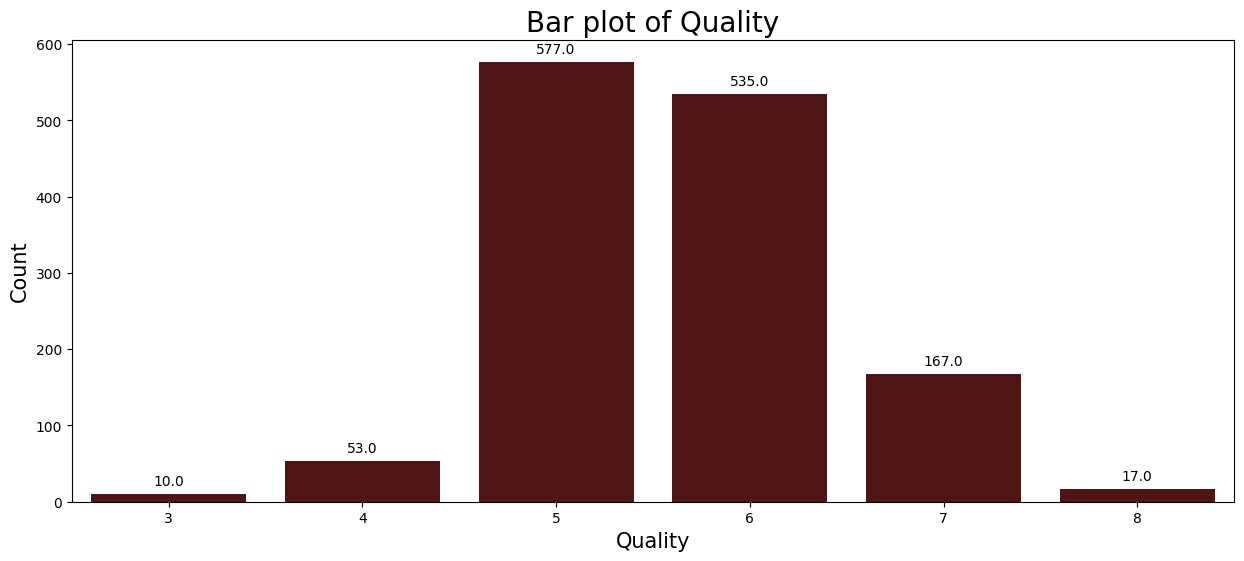

In [ ]:
plt.figure(figsize=(15,6))
quality_count =  df['quality'].value_counts().sort_values(ascending=False).to_frame()
quality_count = quality_count.rename(columns={'quality':'Count'})
ax = sns.barplot(x=quality_count.index, y='Count', data=quality_count, color = "#580c0c")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext = (0,9),
               textcoords='offset points')
plt.xlabel("Quality", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Bar plot of Quality", fontsize=20)
plt.show()

In [ ]:
df.quality.value_counts(normalize=True)

5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: quality, dtype: float64

Wines with quality indicators 5 and 6 are the most common in the data: 42% and 39%, respectively.

<Axes: >

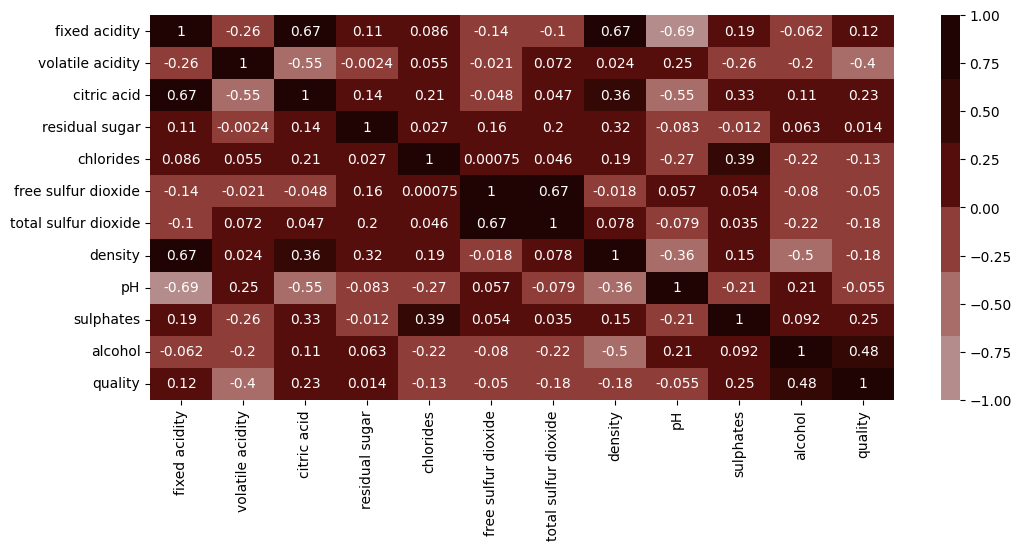

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap=palette_1)

In [ ]:
corr = df.corr()
target_corr = corr["quality"].drop("quality")

target_corr_sorted = target_corr.sort_values(ascending=False)

<Axes: >

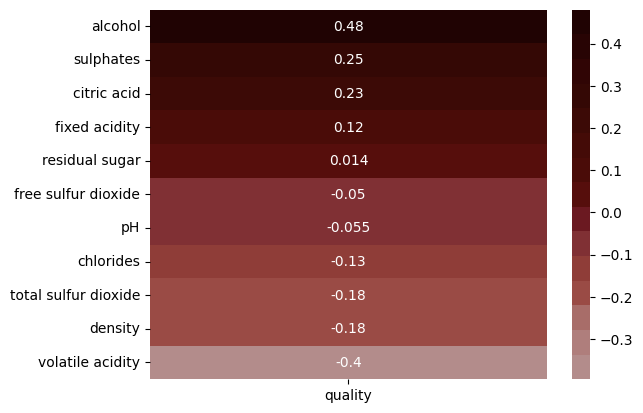

In [ ]:
sns.heatmap(target_corr_sorted.to_frame(), annot=True, cmap = palette_2)

"Quality" has the largest positive correlation with "alcohol" and a negative correlation with "violate acidity".

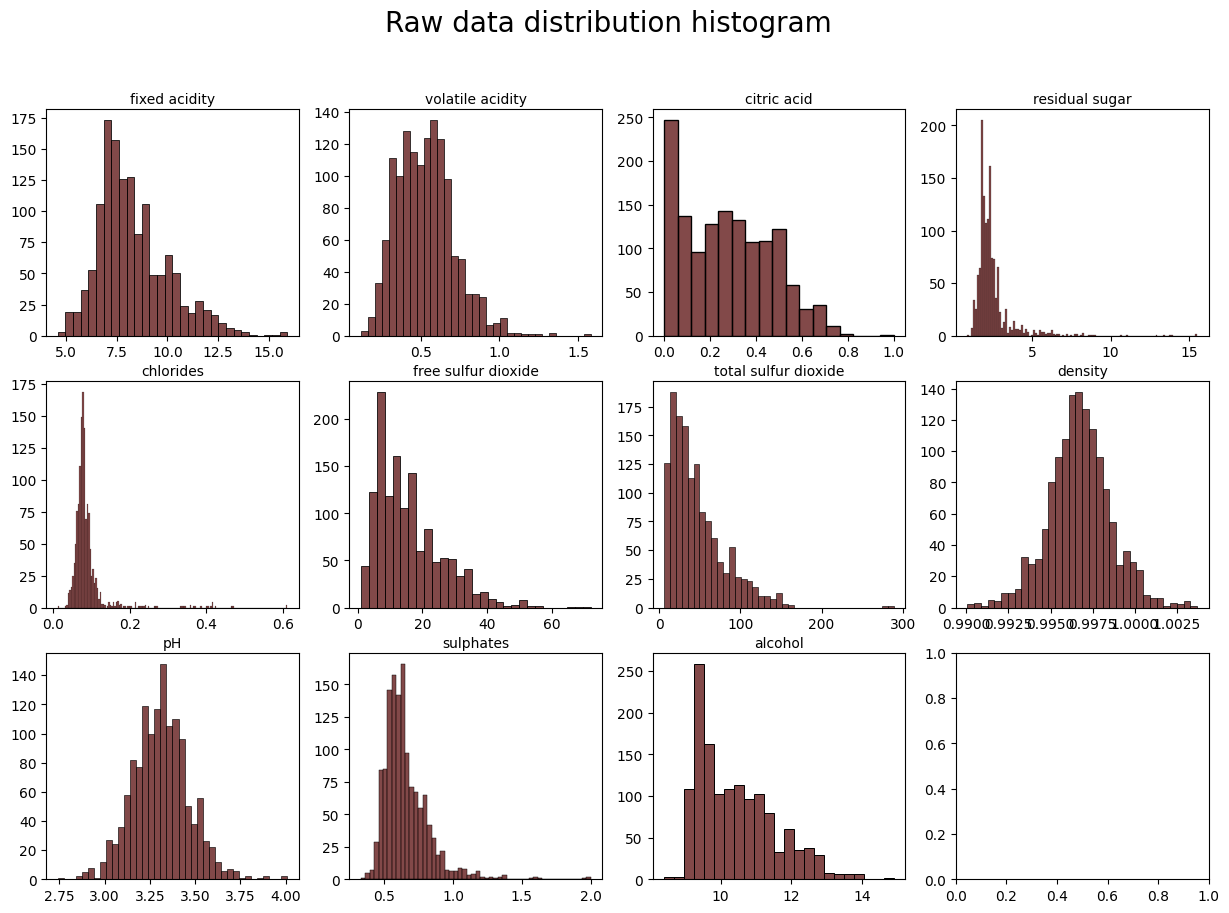

In [ ]:
n_rows, n_cols = 3, 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
fig.suptitle('Raw data distribution histogram', fontsize=20)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols], color = "#580c0c")
    axes[i//n_cols,i%n_cols].xaxis.set_label_position('top')
    axes[i//n_cols,i%n_cols].set(ylabel=None)

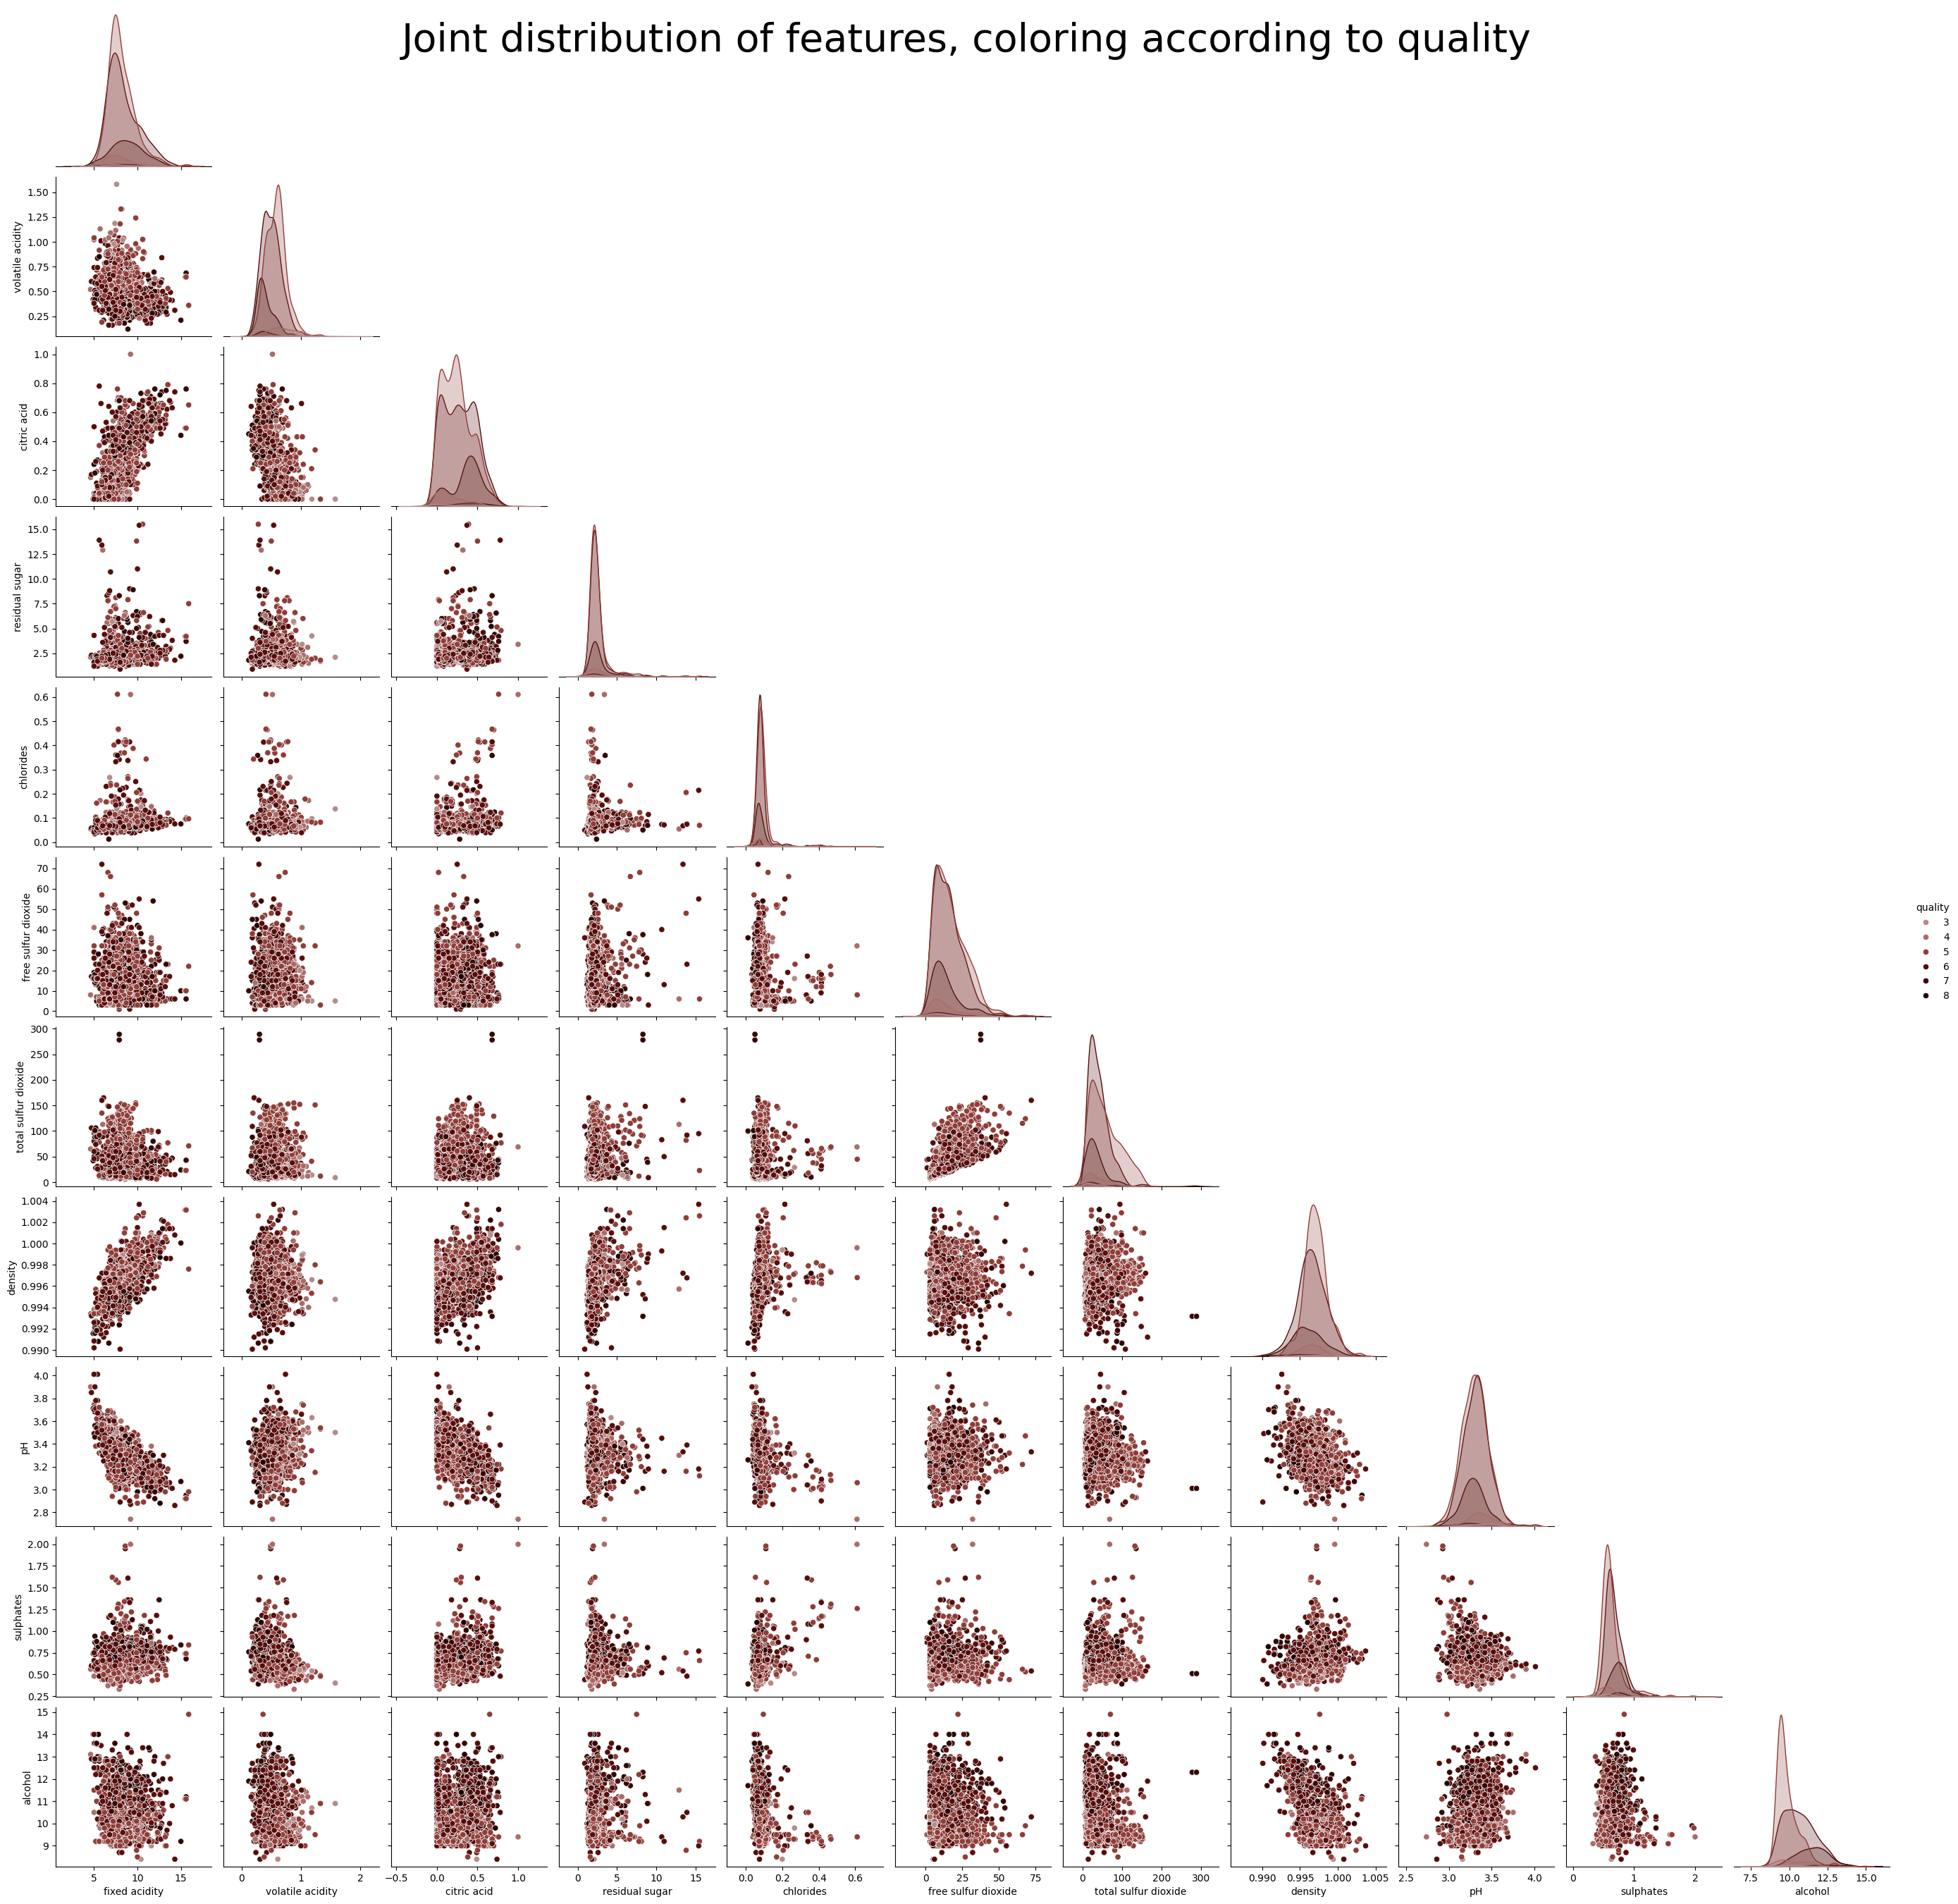

In [ ]:
plot = sns.pairplot(df, corner=True, hue="quality", palette= palette_1)

plot.fig.suptitle("Joint distribution of features, coloring according to quality", fontsize=40)

plt.show()

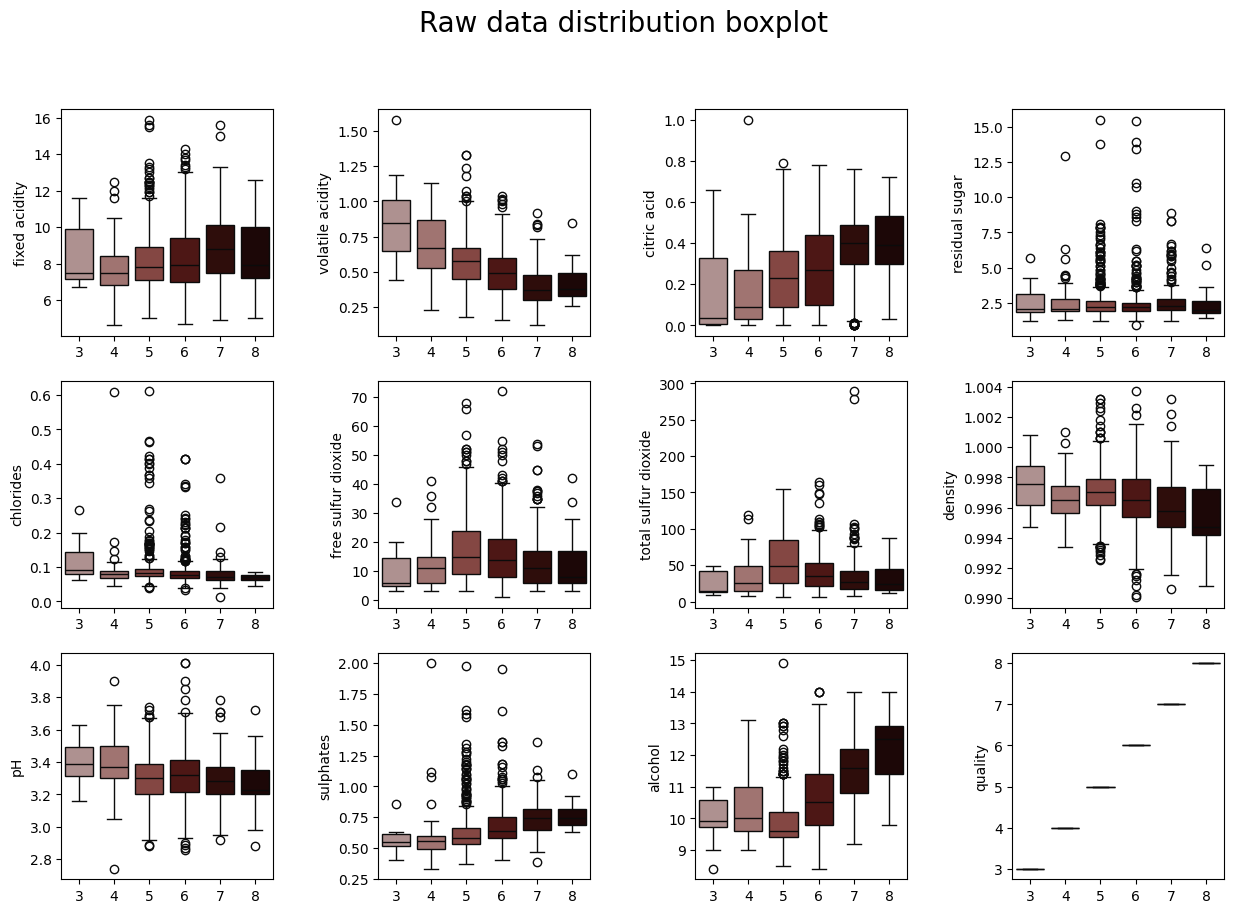

In [ ]:
n_rows, n_cols = 3, 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
fig.suptitle('Raw data distribution boxplot', fontsize=20)
plt.subplots_adjust(wspace=0.5)

for i, column in enumerate(df.columns):
    sns.boxplot(x='quality', y=column, data=df, palette= palette_1, ax=axes[i//n_cols,i%n_cols])
    axes[i//n_cols,i%n_cols].yaxis.set_label_position('left')
    axes[i//n_cols,i%n_cols].set(xlabel=None)

Note that the least outliers ​​are in "citric acid" and "alcohol" features.

## **Data Preparation**

In [ ]:
bins = (2, 5, 8)
group_names = [0, 1]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

Ratings ​​of the "Quality" feature less than 6 have been replaced by 0 (bad), and greater or equal ratings ​​by 1 (good). We chose the threshold based on the average value of the "quality" feature.

In [ ]:
X = df.drop('quality', axis=1)
y = df.quality
y

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: category
Categories (2, int64): [0 < 1]

We separate the "quality" feature from the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

We split the data into train and test sets.

## **Classification**

**In order to optimize the hyperparameters for all models (except Naive Bayes, LDA and QDA), we used Grid search and applied the models with appropriate parameters.**

###**Knn Classifier**

In [ ]:
param_grid = {
    'n_neighbors': [i for i in range(40)],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsClassifier(weights = 'distance')

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 23}
Best accuracy: 0.6923076923076923


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 32, metric = 'manhattan',weights = 'distance')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=32, weights='distance')

In [ ]:
cv_knn = cross_val_score(estimator = model_knn, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_knn.mean())

y_pred_knn_train = model_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = model_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.6857142857142857
Training set:  1.0
Test set:  0.6993318485523385


In [ ]:
pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       212
           1       0.69      0.77      0.73       237

    accuracy                           0.70       449
   macro avg       0.70      0.70      0.70       449
weighted avg       0.70      0.70      0.70       449



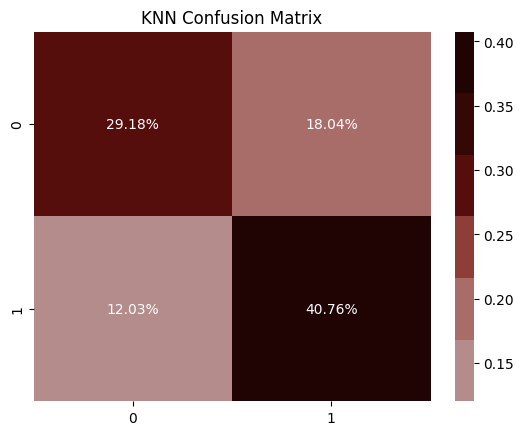

In [ ]:
cm1 = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("KNN Confusion Matrix", fontsize=12)
plt.show()

We got the accuracy ≈ 0.7, TN = 29.18, FN = 18.04, FP = 12.03, TP = 40.76.

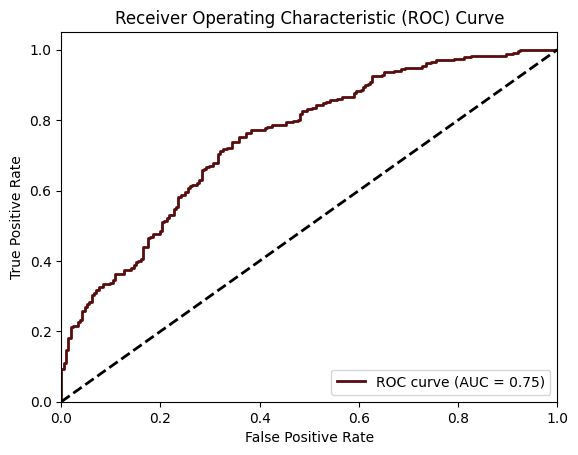

In [ ]:
y_prob_knn = model_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="#580c0c", lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###**Naive Bayes Classifier**

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
cv_nb = cross_val_score(estimator = model_nb, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_nb.mean())

y_pred_nb_train = model_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = model_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.7120879120879121
Training set:  0.7186813186813187
Test set:  0.7527839643652561


In [ ]:
pred_nb = model_nb.predict(X_test)
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       212
           1       0.78      0.74      0.76       237

    accuracy                           0.75       449
   macro avg       0.75      0.75      0.75       449
weighted avg       0.75      0.75      0.75       449



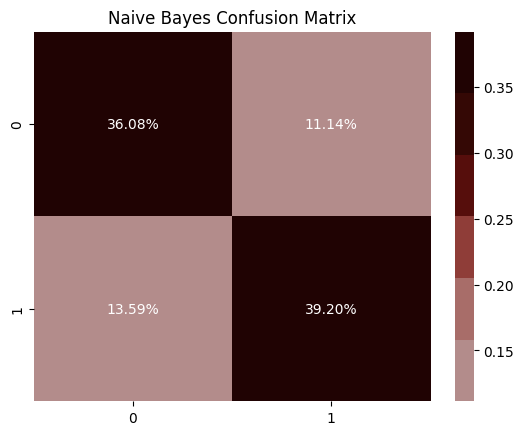

In [ ]:
cm2 = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("Naive Bayes Confusion Matrix", fontsize=12)
plt.show()

We got the accuracy ≈ 0.75, TN = 36.08, FN = 11.14, FP = 13.59, TP = 39.20.

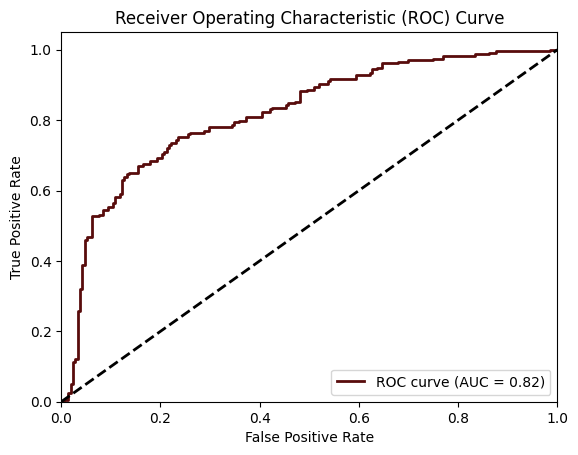

In [ ]:
y_prob_nb = model_nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="#580c0c", lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **LDA Classifier**

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
cv_lda = cross_val_score(estimator=model_lda, X=X_train, y=y_train, cv=5)
print("CV: ", cv_lda.mean())

y_pred_lda_train = model_lda.predict(X_train)
accuracy_lda_train = accuracy_score(y_train, y_pred_lda_train)
print("Training set: ", accuracy_lda_train)

y_pred_lda_test = model_lda.predict(X_test)
accuracy_lda_test = accuracy_score(y_test, y_pred_lda_test)
print("Test set: ", accuracy_lda_test)

CV:  0.7263736263736265
Training set:  0.7318681318681318
Test set:  0.7683741648106904


In [ ]:
print(classification_report(y_test, y_pred_lda_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       212
           1       0.78      0.78      0.78       237

    accuracy                           0.77       449
   macro avg       0.77      0.77      0.77       449
weighted avg       0.77      0.77      0.77       449



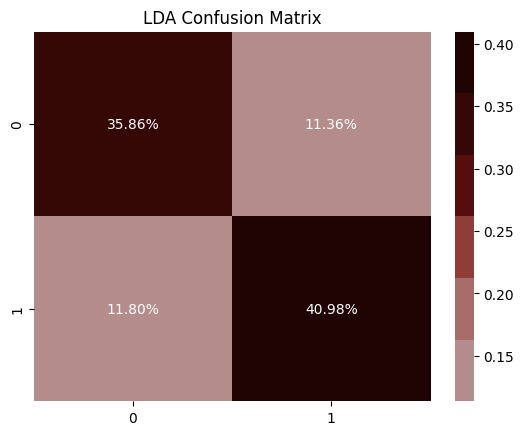

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_lda_test)
sns.heatmap(cm3 / np.sum(cm3), annot=True, fmt='0.2%', cmap=palette_1)
plt.title("LDA Confusion Matrix")
plt.show()

We got the accuracy ≈ 0.77, TN = 35.86, FN = 11.36, FP = 11.80, TP = 40.98.

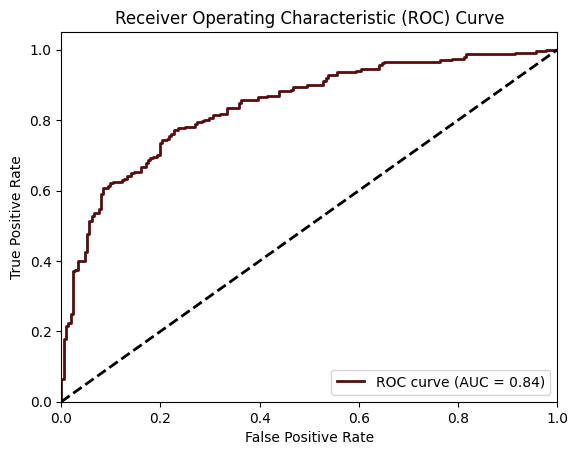

In [ ]:
y_prob_lda = model_lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

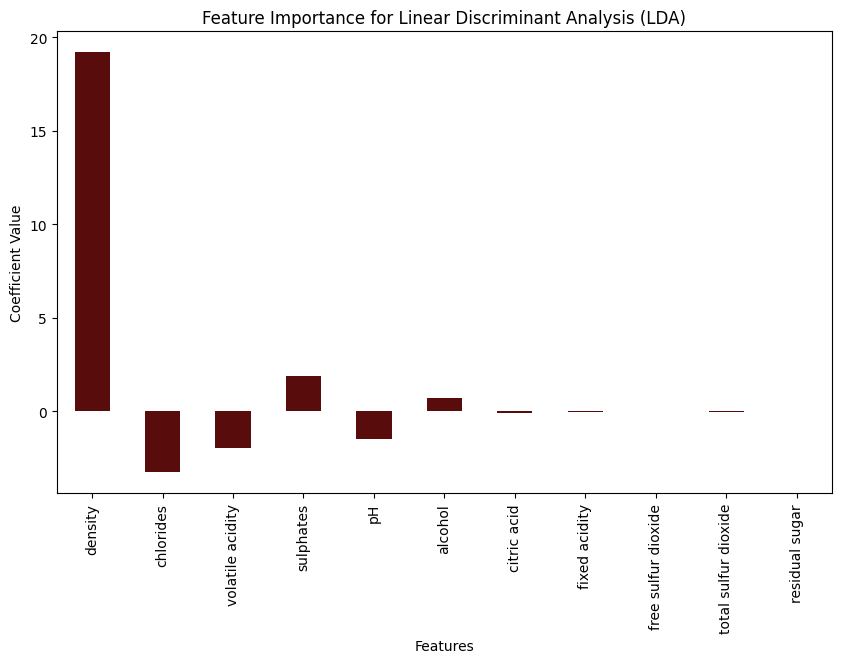

In [ ]:
coefficients_lda = model_lda.scalings_

feature_importance_lda = pd.DataFrame(coefficients_lda, index=X_train.columns, columns=['Coefficient'])

feature_importance_lda['Absolute'] = feature_importance_lda['Coefficient'].abs()
sorted_feature_importance_lda = feature_importance_lda.sort_values(by='Absolute', ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importance_lda['Coefficient'].plot(kind='bar', color="#580c0c")
plt.title('Feature Importance for Linear Discriminant Analysis (LDA)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### **QDA Classifier**

In [ ]:
model_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
model_qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
cv_qda = cross_val_score(estimator=model_qda, X=X_train, y=y_train, cv=5)
print("CV: ", cv_qda.mean())

y_pred_qda_train = model_qda.predict(X_train)
accuracy_qda_train = accuracy_score(y_train, y_pred_qda_train)
print("Training set: ", accuracy_qda_train)

y_pred_qda_test = model_qda.predict(X_test)
accuracy_qda_test = accuracy_score(y_test, y_pred_qda_test)
print("Test set: ", accuracy_qda_test)

CV:  0.710989010989011
Training set:  0.7274725274725274
Test set:  0.7438752783964365


In [ ]:
print(classification_report(y_test, y_pred_qda_test))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       212
           1       0.74      0.79      0.76       237

    accuracy                           0.74       449
   macro avg       0.74      0.74      0.74       449
weighted avg       0.74      0.74      0.74       449



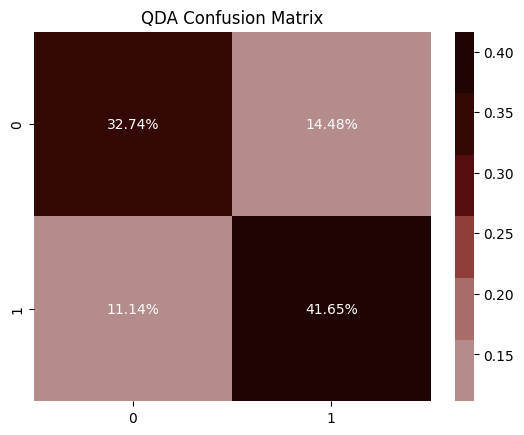

In [ ]:
cm4 = confusion_matrix(y_test, y_pred_qda_test)
sns.heatmap(cm4 / np.sum(cm4), annot=True, fmt='0.2%', cmap=palette_1)
plt.title("QDA Confusion Matrix")
plt.show()

We got the accuracy ≈ 0.74, TN = 32.74, FN = 14.48, FP = 11.14, TP = 41.65.

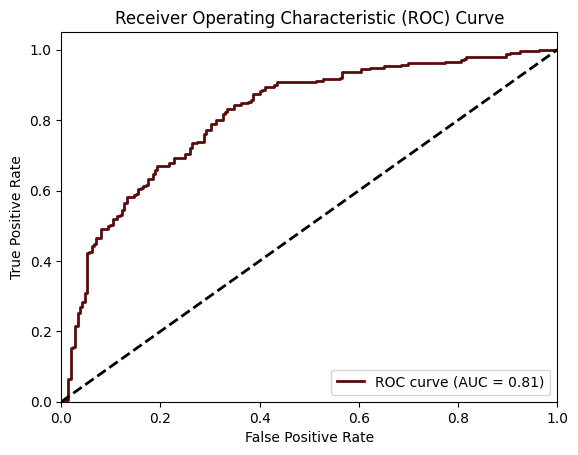

In [ ]:
y_prob_qda = model_qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="#580c0c", lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###**Logistic Regression**

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'solver': ['liblinear']  # Solver algorithm for optimization
}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'C': 10.0, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.732967032967033


In [ ]:
model_LR=LogisticRegression(max_iter=1000, C = 10.0, fit_intercept = False, penalty= "l2", solver= 'liblinear')
model_LR.fit(X_train, y_train)

LogisticRegression(C=10.0, fit_intercept=False, max_iter=1000,
                   solver='liblinear')

In [ ]:
cv_lr = cross_val_score(estimator = model_LR, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_lr.mean())

y_pred_lr_train = model_LR.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = model_LR.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.732967032967033
Training set:  0.7384615384615385
Test set:  0.7639198218262806


In [ ]:
pred_LR = model_LR.predict(X_test)
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       212
           1       0.78      0.78      0.78       237

    accuracy                           0.76       449
   macro avg       0.76      0.76      0.76       449
weighted avg       0.76      0.76      0.76       449



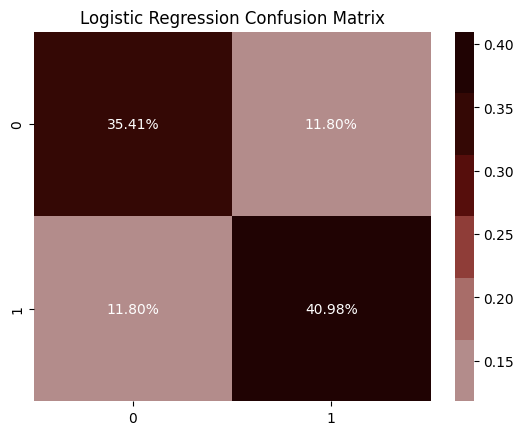

In [ ]:
cm5 = confusion_matrix(y_test, pred_LR)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("Logistic Regression Confusion Matrix", fontsize=12)
plt.show()

We got the accuracy ≈ 0.76, TN = 35.41, FN = 11.80, FP = 11.80, TP = 40.98:

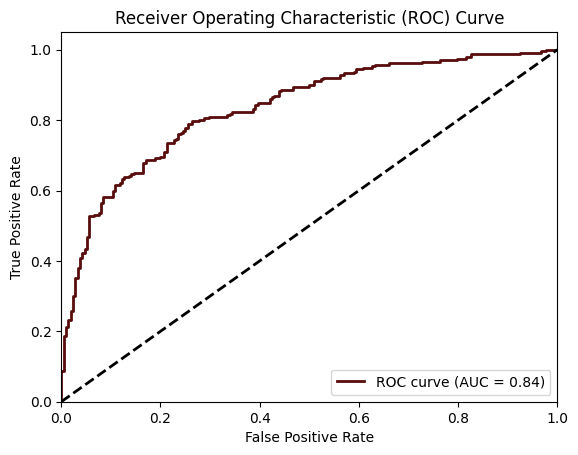

In [ ]:
y_prob_LR = model_LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_LR)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

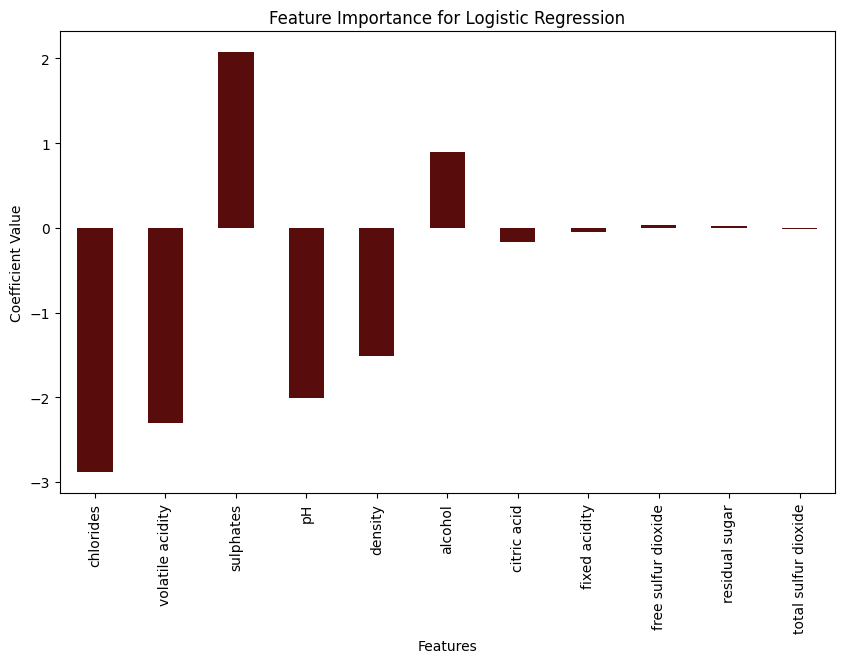

In [ ]:
coefficients = model_LR.coef_[0]

feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

feature_importance['Absolute'] = feature_importance['Coefficient'].abs()
sorted_feature_importance = feature_importance.sort_values(by='Absolute', ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importance['Coefficient'].plot(kind='bar', color = "#580c0c")
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### **SVM Classifier**



In [ ]:
param_grid = {
    'C': [0.1, 1, 10],  # Penalty parameter C
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy: 0.7318681318681319


In [ ]:
model_svm = SVC(kernel='linear', random_state = 42, C=1, gamma = 'scale', probability=True)
model_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=42)

In [ ]:
cv_svm = cross_val_score(estimator = model_svm, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_svm.mean())

y_pred_svm_train = model_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)

y_pred_svm_test = model_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

CV:  0.7318681318681319
Training set:  0.734065934065934
Test set:  0.7594654788418709


In [ ]:
pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       212
           1       0.78      0.76      0.77       237

    accuracy                           0.76       449
   macro avg       0.76      0.76      0.76       449
weighted avg       0.76      0.76      0.76       449



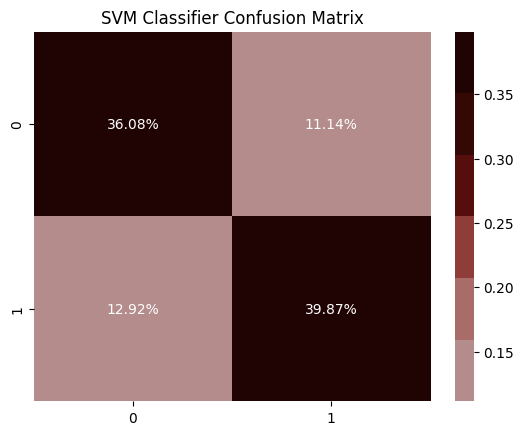

In [ ]:
cm8 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm8/np.sum(cm8), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

We got the accuracy ≈ 0.76, TN = 36.08, FN = 11.14, FP = 12.92, TP = 39.87:

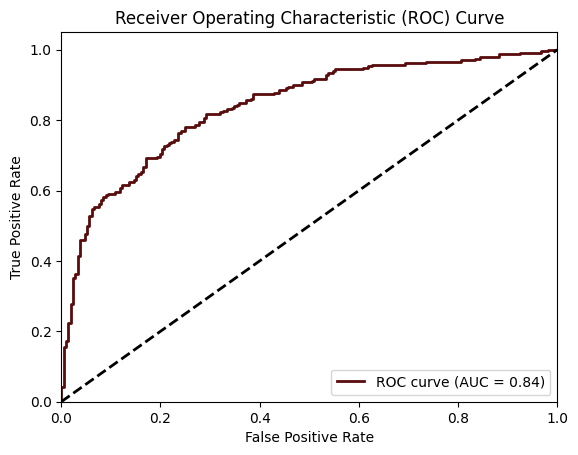

In [ ]:
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

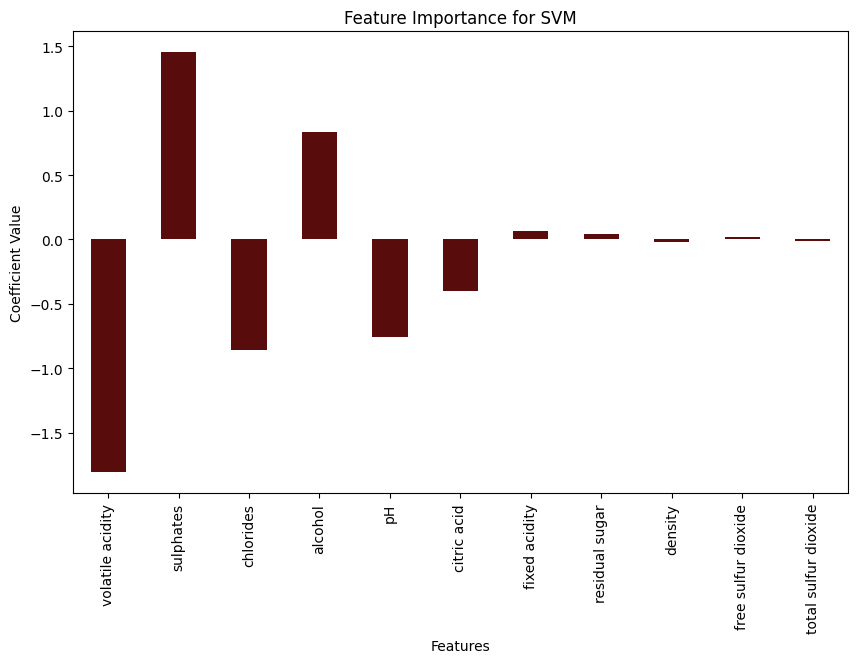

In [ ]:
coefficients = model_svm.coef_[0]

feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

feature_importance['Absolute'] = feature_importance['Coefficient'].abs()
sorted_feature_importance = feature_importance.sort_values(by='Absolute', ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importance['Coefficient'].plot(kind='bar', color="#580c0c")
plt.title('Feature Importance for SVM')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### **Decision Tree Classifier**

In [ ]:
param_grid = {
    'max_depth': range(3,9),  # Maximum depth of the tree
    'criterion': ['gini', 'entropy']  # Split criterion
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'criterion': 'gini', 'max_depth': 5}
Best accuracy: 0.7285714285714286


In [ ]:
model_dt = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, random_state= 42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
cv_dt = cross_val_score(estimator = model_dt, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_dt.mean())

y_pred_dt_train = model_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = model_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.7109890109890109
Training set:  0.765934065934066
Test set:  0.7126948775055679


In [ ]:
pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       212
           1       0.72      0.76      0.74       237

    accuracy                           0.71       449
   macro avg       0.71      0.71      0.71       449
weighted avg       0.71      0.71      0.71       449



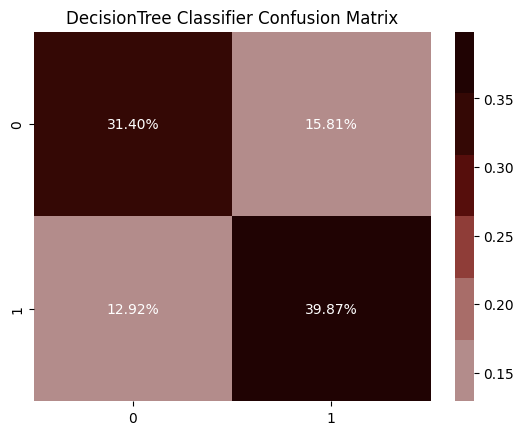

In [ ]:
cm9 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm9/np.sum(cm9), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("DecisionTree Classifier Confusion Matrix",fontsize=12)
plt.show()

We got the accuracy ≈ 0.71, TN = 31.40, FN = 15.81, FP = 12.92, TP = 39.87:

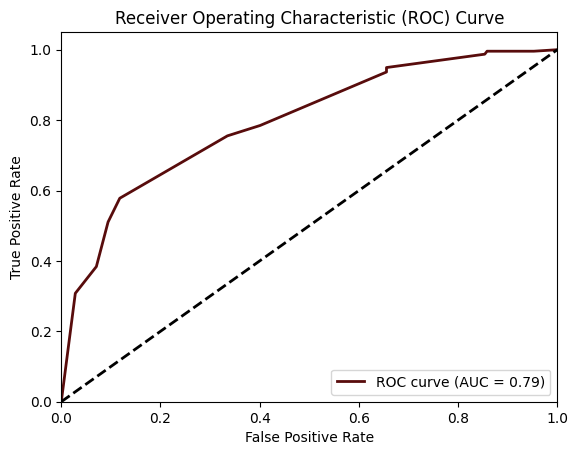

In [ ]:
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

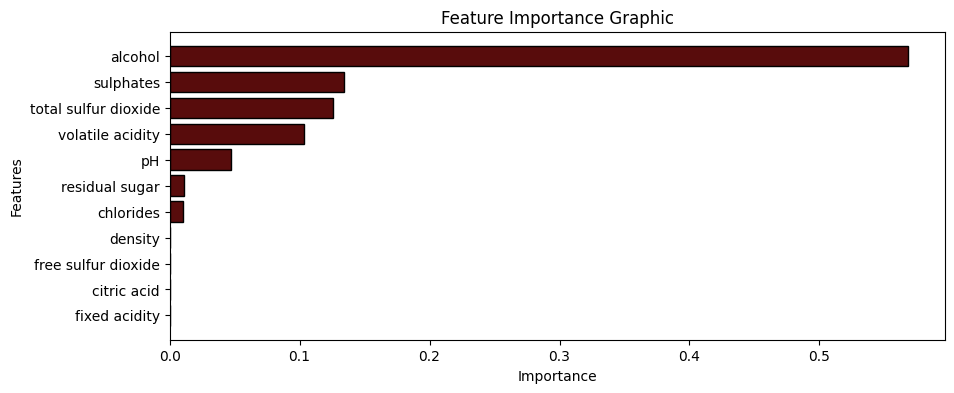

In [ ]:
imp_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_dt.feature_importances_
})

imp_feature = imp_feature.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 4))
plt.title("Feature Importance Graphic")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color="#580c0c", edgecolor='Black')
plt.show()

###**Random Forest Classifier**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 6, 9, None],  # Maximum depth of the trees
    'criterion': ['gini', 'entropy']  # Split criterion
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best accuracy: 0.7604395604395604


In [ ]:
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=9, random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=1)

In [ ]:
cv_rf = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_rf.mean())

y_pred_rf_train = model_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = model_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.7516483516483516
Training set:  0.9516483516483516
Test set:  0.7661469933184856


In [ ]:
pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       212
           1       0.76      0.81      0.79       237

    accuracy                           0.77       449
   macro avg       0.77      0.76      0.76       449
weighted avg       0.77      0.77      0.77       449



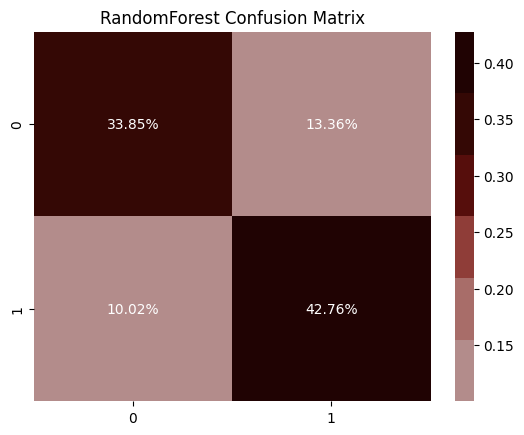

In [ ]:
cm6 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("RandomForest Confusion Matrix", fontsize=12)
plt.show()

We got the accuracy ≈ 0.77, TN = 33.85, FN = 13.36, FP = 10.02, TP = 42.76.




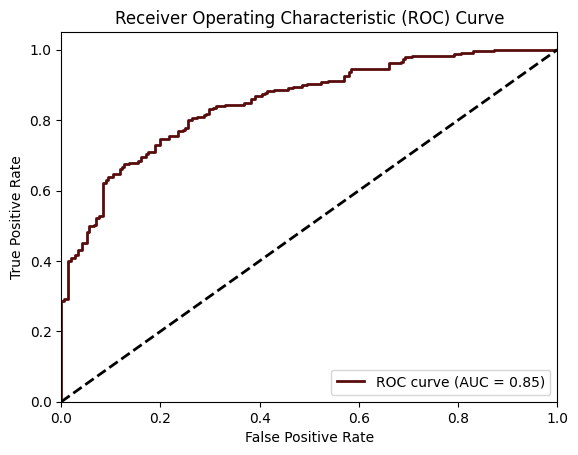

In [ ]:
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

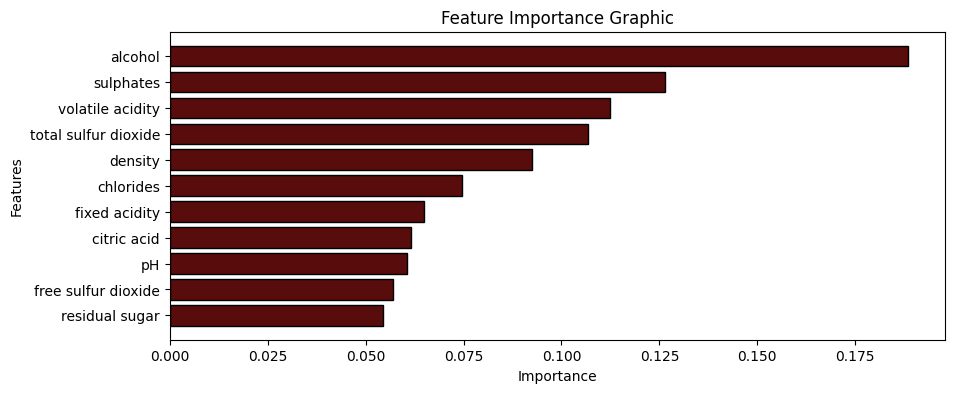

In [ ]:
imp_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
})

imp_feature = imp_feature.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 4))
plt.title("Feature Importance Graphic")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color="#580c0c", edgecolor='Black')
plt.show()

###**AdaBoost Classifier**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'learning_rate': [0.1, 0.5, 1.0]  # Learning rate
}

ada = AdaBoostClassifier()
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best Score:  0.7472527472527473


In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100, random_state=42)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
cv_ada = cross_val_score(estimator = model_ada, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_ada.mean())

y_pred_ada_train = model_ada.predict(X_train)
accuracy_ada_train = accuracy_score(y_train, y_pred_ada_train)
print("Training set: ", accuracy_ada_train)

y_pred_ada_test = model_ada.predict(X_test)
accuracy_ada_test = accuracy_score(y_test, y_pred_ada_test)
print("Test set: ", accuracy_ada_test)

CV:  0.7472527472527473
Training set:  0.7714285714285715
Test set:  0.7750556792873051


In [ ]:
pred_ada = model_ada.predict(X_test)
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       212
           1       0.77      0.82      0.79       237

    accuracy                           0.78       449
   macro avg       0.78      0.77      0.77       449
weighted avg       0.78      0.78      0.77       449



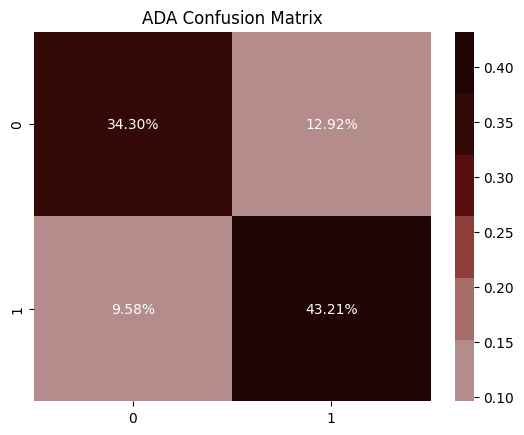

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("ADA Confusion Matrix", fontsize=12)
plt.show()

We got the accuracy ≈ 0.78, TN = 34.30, FN = 12.92, FP = 9.58, TP = 43.21:

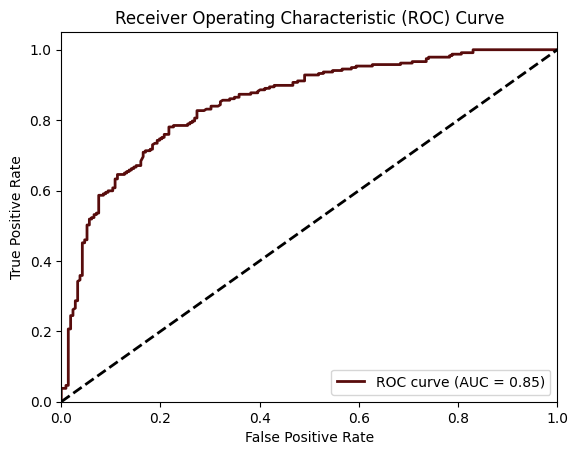

In [ ]:
y_prob_ada = model_ada.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

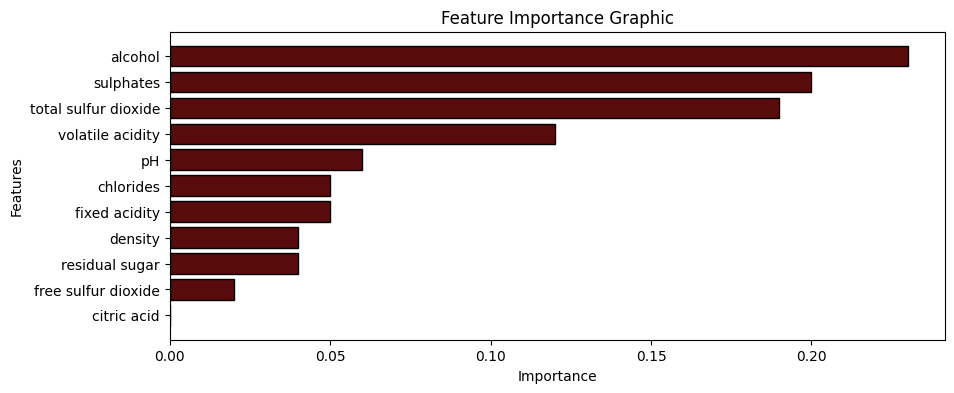

In [ ]:
imp_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_ada.feature_importances_
})

imp_feature = imp_feature.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 4))
plt.title("Feature Importance Graphic")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color="#580c0c", edgecolor='Black')
plt.show()

### **XGBoost Classifier**

In [ ]:
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
cv_xgb = cross_val_score(estimator = model_xgb, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_xgb.mean())

y_pred_xgb_train = model_xgb.predict(X_train)
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
print("Training set: ", accuracy_xgb_train)

y_pred_xgb_test = model_xgb.predict(X_test)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
print("Test set: ", accuracy_xgb_test)

CV:  0.7373626373626374
Training set:  0.9923076923076923
Test set:  0.7639198218262806


In [ ]:
pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       212
           1       0.77      0.79      0.78       237

    accuracy                           0.76       449
   macro avg       0.76      0.76      0.76       449
weighted avg       0.76      0.76      0.76       449



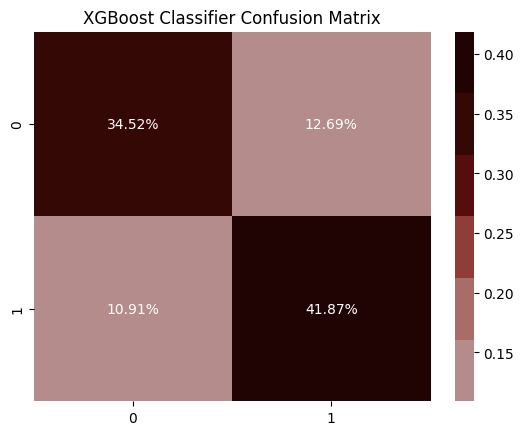

In [ ]:
cm10 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm10/np.sum(cm10), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("XGBoost Classifier Confusion Matrix",fontsize=12)
plt.show()

We got the accuracy ≈ 0.76, TN = 34.52, FN = 12.69, FP = 10.91, TP = 41.87.

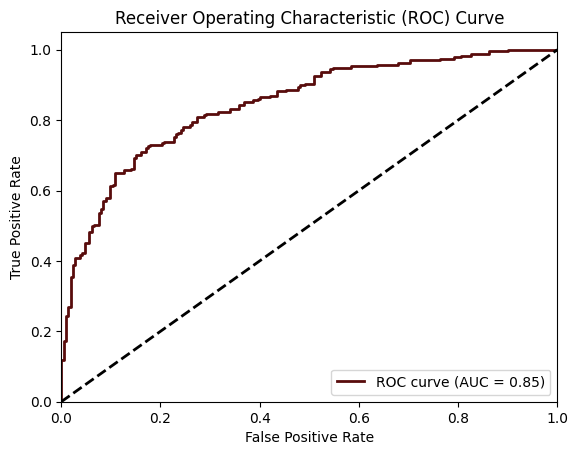

In [ ]:
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

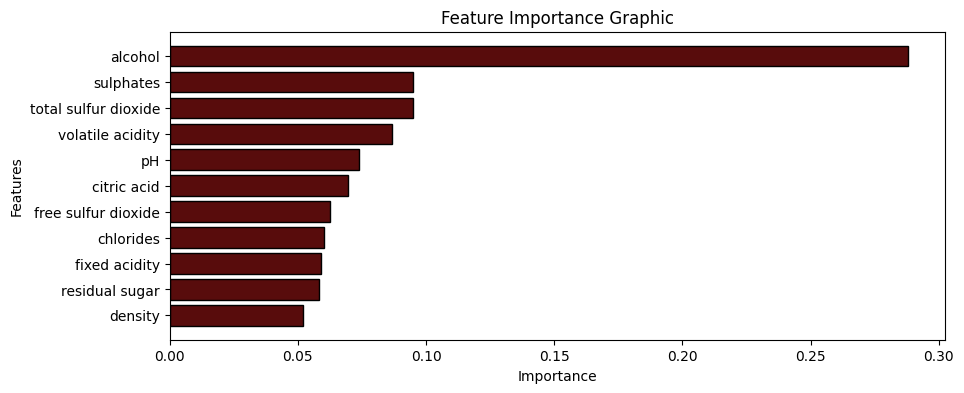

In [ ]:
imp_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_xgb.feature_importances_
})

imp_feature = imp_feature.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 4))
plt.title("Feature Importance Graphic")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color="#580c0c", edgecolor='Black')
plt.show()

### **Voting Classifier**

In [ ]:
log_reg = LogisticRegression()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('dt', dt)],
    voting='soft'
)

param_grid = {
    'lr__C': [0.1, 1.0, 10.0],  # C parameter for Logistic Regression
    'svm__C': [0.1, 1.0, 10.0],  # C parameter for SVM
    'dt__max_depth': [3, 5, None]  # Maximum depth for Decision Tree
}

grid_search = GridSearchCV(voting, param_grid, cv=5)
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'dt__max_depth': 3, 'lr__C': 10.0, 'svm__C': 10.0}
Best Score:  0.7269996744085088


In [ ]:
log_reg = LogisticRegression(C=10)
svm = SVC(C=10.0, probability=True)
dt = DecisionTreeClassifier(max_depth=3)

model_vot = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('dt', dt)],
    voting='soft'
)

In [ ]:
model_vot.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10)),
                             ('svm', SVC(C=10.0, probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [ ]:
cv_vot = cross_val_score(estimator = model_vot, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_vot.mean())

y_pred_vot_train = model_vot.predict(X_train)
accuracy_vot_train = accuracy_score(y_train, y_pred_vot_train)
print("Training set: ", accuracy_vot_train)

y_pred_vot_test = model_vot.predict(X_test)
accuracy_vot_test = accuracy_score(y_test, y_pred_vot_test)
print("Test set: ", accuracy_vot_test)

CV:  0.7219780219780221
Training set:  0.7494505494505495
Test set:  0.7394209354120267


In [ ]:
pred_vot = model_vot.predict(X_test)
print(classification_report(y_test, pred_vot))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       212
           1       0.75      0.77      0.76       237

    accuracy                           0.74       449
   macro avg       0.74      0.74      0.74       449
weighted avg       0.74      0.74      0.74       449



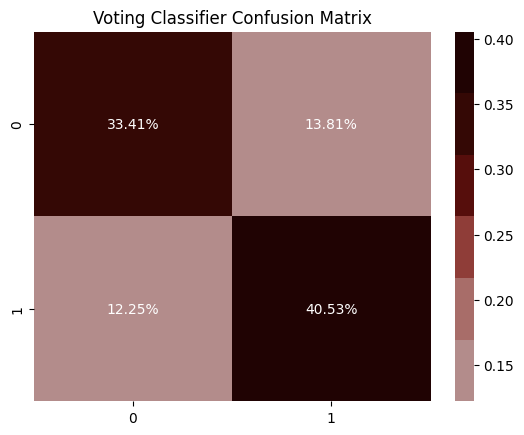

In [ ]:
cm12 = confusion_matrix(y_test, pred_vot)
sns.heatmap(cm12/np.sum(cm12), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("Voting Classifier Confusion Matrix",fontsize=12)
plt.show()

We got the accuracy ≈ 0.74, TN = 33.41, FN = 13.81, FP = 12.25, TP = 40.53.

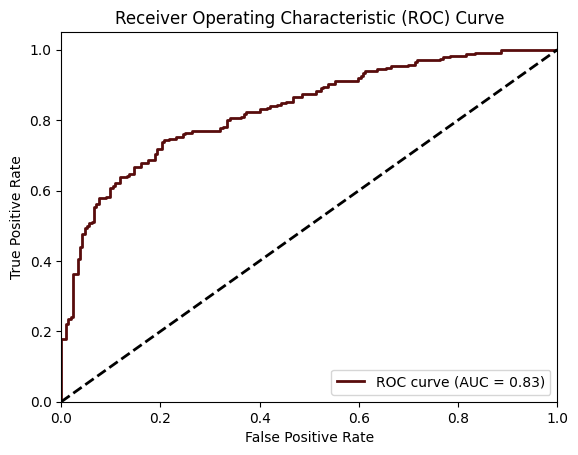

In [ ]:
y_prob_vot = model_vot.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_vot)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


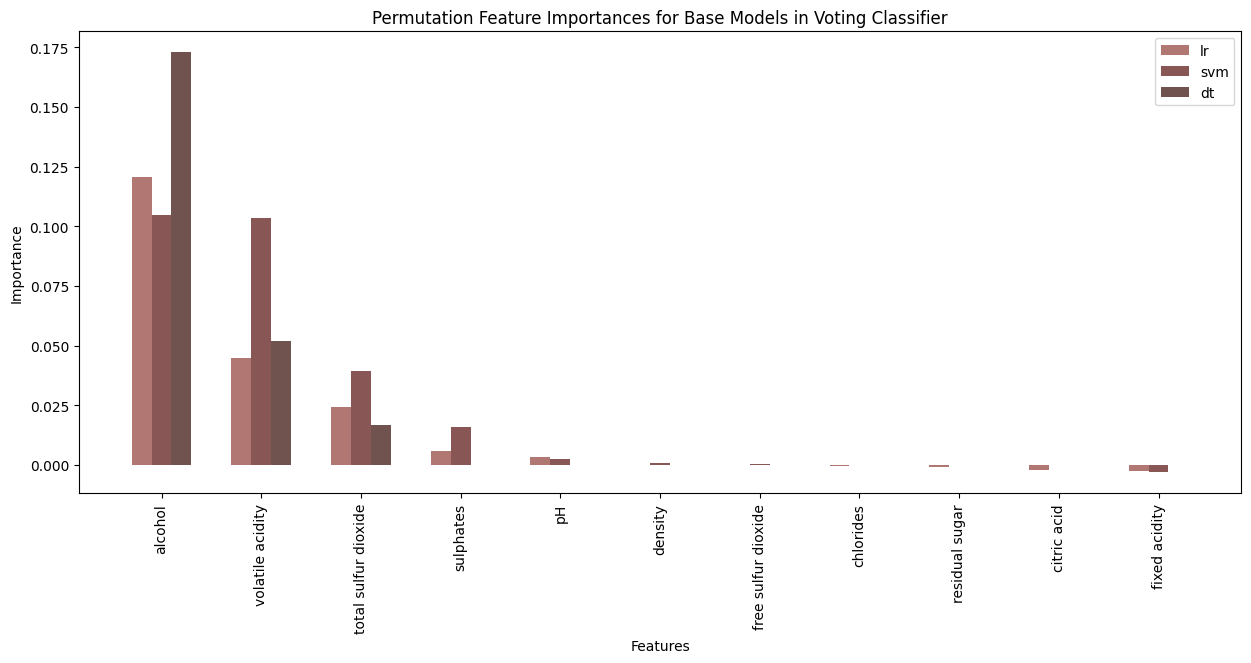

In [ ]:
feature_importances = {}

for name, model in model_vot.named_estimators_.items():
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]
    feature_importances[name] = {'importances': importances, 'indices': indices}

plt.figure(figsize=(15, 6))

bar_width = 0.2
num_models = len(feature_importances)

for i, (name, info) in enumerate(feature_importances.items()):
    positions = np.arange(X_train.shape[1]) + i * bar_width
    c = palette_1[i+2]
    plt.bar(positions, info['importances'][info['indices']], width=bar_width, alpha=0.7, label=f'{name}', color = c)

plt.title('Permutation Feature Importances for Base Models in Voting Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(np.arange(X_train.shape[1]) + (bar_width * (num_models - 1)) / 2, X_train.columns[info['indices']], rotation=90)
plt.legend()
plt.show()

### **Stacking Classifier**

In [ ]:
log_reg = LogisticRegression()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()

stacking = StackingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('dt', dt)],
    final_estimator=LogisticRegression()
)

param_grid = {
    'lr__C': [0.1, 1.0, 10.0],  # C parameter for Logistic Regression
    'svm__C': [0.1, 1.0, 10.0],  # C parameter for SVM
    'dt__max_depth': [3, 5, None],  # Maximum depth for Decision Tree
    'final_estimator__C': [0.1, 1.0, 10.0]  # C parameter for the final estimator
}

grid_search = GridSearchCV(stacking, param_grid, cv=5)
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'dt__max_depth': None, 'final_estimator__C': 1.0, 'lr__C': 0.1, 'svm__C': 10.0}
Best Score:  0.7314222921640982


In [ ]:
log_reg = LogisticRegression(C=10)
svm = SVC(C=10, probability=True)
dt = DecisionTreeClassifier(max_depth=3)

model_stack = StackingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('dt', dt)],
    final_estimator=LogisticRegression(C=1.0)
)

In [ ]:
model_stack.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(C=10)),
                               ('svm', SVC(C=10, probability=True)),
                               ('dt', DecisionTreeClassifier(max_depth=3))],
                   final_estimator=LogisticRegression())

In [ ]:
cv_stack = cross_val_score(estimator = model_stack, X = X_train, y = y_train, cv = 5)
print("CV: ", cv_stack.mean())

y_pred_stack_train = model_stack.predict(X_train)
accuracy_stack_train = accuracy_score(y_train, y_pred_stack_train)
print("Training set: ", accuracy_stack_train)

y_pred_stack_test = model_stack.predict(X_test)
accuracy_stack_test = accuracy_score(y_test, y_pred_stack_test)
print("Test set: ", accuracy_stack_test)

CV:  0.724175824175824
Training set:  0.7461538461538462
Test set:  0.7461024498886414


In [ ]:
pred_stack = model_stack.predict(X_test)
print(classification_report(y_test, pred_stack))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       212
           1       0.76      0.77      0.76       237

    accuracy                           0.75       449
   macro avg       0.75      0.74      0.75       449
weighted avg       0.75      0.75      0.75       449



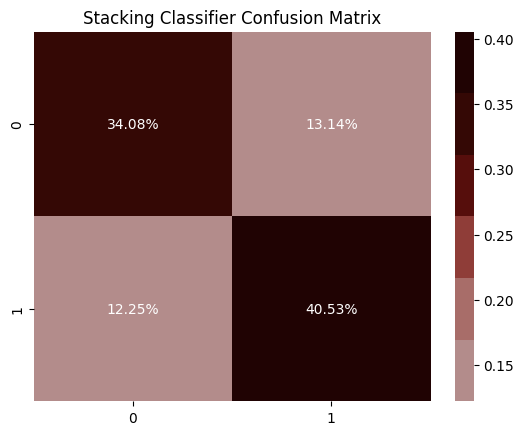

In [ ]:
cm13 = confusion_matrix(y_test, pred_stack)
sns.heatmap(cm13/np.sum(cm13), annot = True, fmt=  '0.2%', cmap = palette_1)
plt.title("Stacking Classifier Confusion Matrix",fontsize=12)
plt.show()

We got the accuracy ≈ 0.75, TN = 34.08, FN = 13․14, FP = 12.25, TP = 40.53.

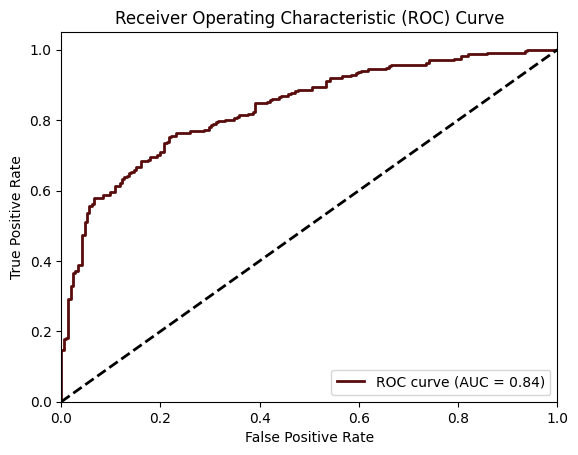

In [ ]:
y_prob_stack = model_stack.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='#580c0c', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


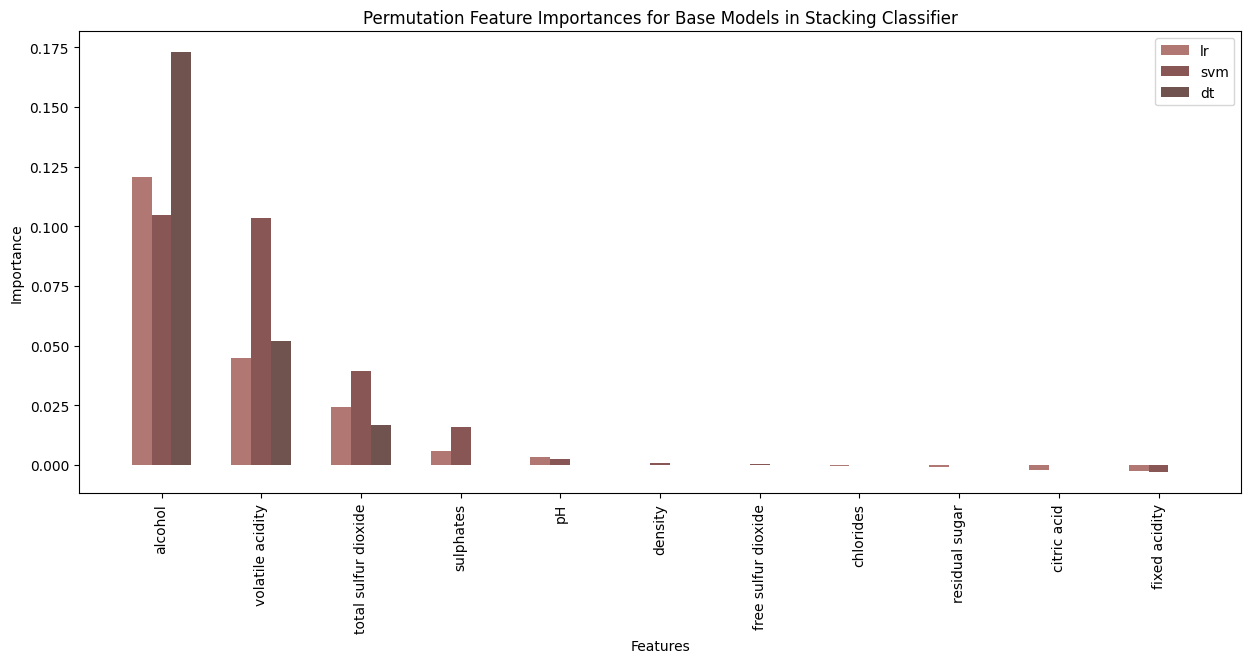

In [ ]:
feature_importances = {}

for name, model in model_stack.named_estimators_.items():
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]
    feature_importances[name] = {'importances': importances, 'indices': indices}

plt.figure(figsize=(15, 6))

bar_width = 0.2
num_models = len(feature_importances)

for i, (name, info) in enumerate(feature_importances.items()):
    positions = np.arange(X_train.shape[1]) + i * bar_width
    c = palette_1[i+2]
    plt.bar(positions, info['importances'][info['indices']], width=bar_width, alpha=0.7, label=f'{name}', color = c)

plt.title('Permutation Feature Importances for Base Models in Stacking Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(np.arange(X_train.shape[1]) + (bar_width * (num_models - 1)) / 2, X_train.columns[info['indices']], rotation=90)
plt.legend()
plt.show()


## **Final report**

In [ ]:
output = pd.DataFrame({"Model":['KNN Classifier','Naive-Bayes','LDA Classifier','QDA Classifier','Logistic Regression',
                                'Random Forest Classifier','AdaBoost Classifier','SVM Classifier',
                               'Decision Tree Classifier','XGB Classifier',
                               'Voting Classifier','Stacking Classifier'],
                      "Accuracy":[accuracy_knn_test, accuracy_nb_test, accuracy_lda_test, accuracy_qda_test, accuracy_lr_test, accuracy_rf_test, accuracy_ada_test, accuracy_svm_test,
                                 accuracy_dt_test, accuracy_xgb_test, accuracy_vot_test, accuracy_stack_test]})

In [ ]:
output

Model  Accuracy
0             KNN Classifier  0.699332
1                Naive-Bayes  0.752784
2             LDA Classifier  0.768374
3             QDA Classifier  0.743875
4        Logistic Regression  0.763920
5   Random Forest Classifier  0.766147
6        AdaBoost Classifier  0.775056
7             SVM Classifier  0.759465
8   Decision Tree Classifier  0.712695
9             XGB Classifier  0.763920
10         Voting Classifier  0.739421
11       Stacking Classifier  0.746102

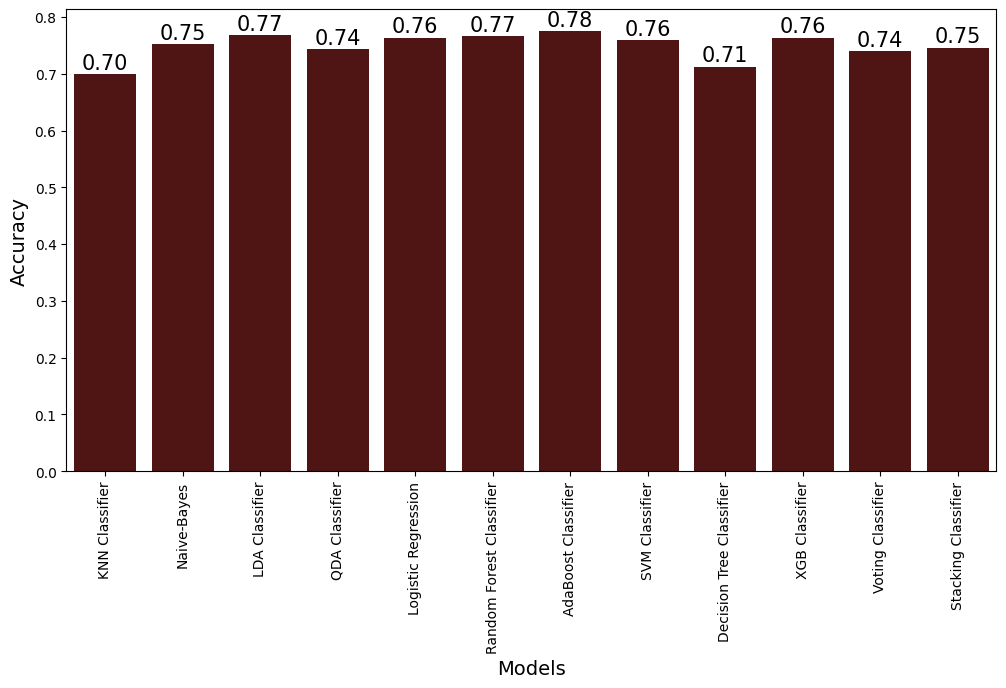

In [ ]:
color_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
plots = sns.barplot(x='Model', y='Accuracy', data=output, color="#580c0c")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=90)
plt.ylabel("Accuracy", size=14)
plt.show()


Thus, the best result is given by AdaBoost Classifier.

## **Prediction for "HIN ARENI" wine**

"HIN ARENI" 2020 red wine

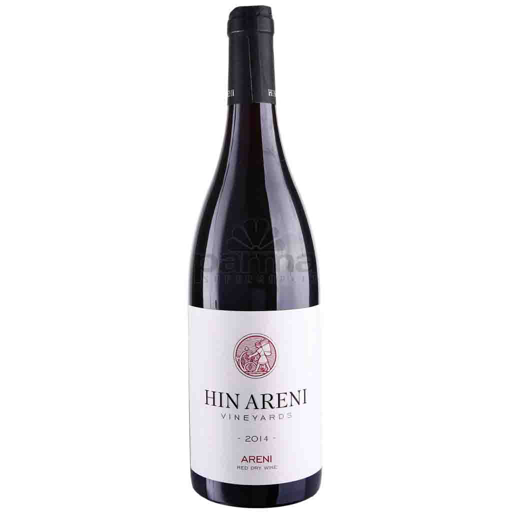

In [ ]:
uploaded_image = Image.open("hin_areni.png")
resized_image = uploaded_image.resize((512, 512))
resized_image

In [ ]:
df["chlorides"].mean()

0.08812362030905076

In [ ]:
df["sulphates"].mean()

0.6587049300956587

In [ ]:
input_data = (4.8, 0.6, 0, 1, 0.08, 30, 98, 0.995, 3.35, 0.65, 14.5)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_ada.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


In [ ]:
prediction = model_xgb.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


In [ ]:
prediction = model_lda.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


In [ ]:
prediction = model_knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


So, our best 3 and worst models gave a positive qualification.